In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
dataset=pd.read_csv("C:\\Users\\ubed shaikh\\OneDrive\\Desktop\\Data Science\\Salary_Data (1).csv")
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data1 = dataset.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)
data1

,YE,Sal
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [6]:
print(skew(data1.YE))

NameError: name 'skew' is not defined

<Axes: >

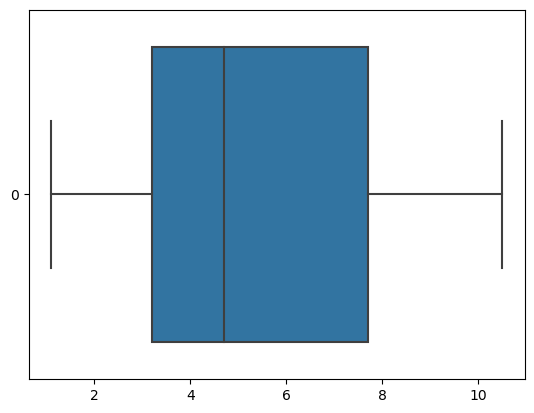

In [7]:
sns.boxplot(data1['YE'], orient = 'h')

The data for Year Experience is skewed right.Thelies in the intervals of approximately 3 to 8.The median years of experience is 5.2 years.

C:\Users\ubed shaikh\AppData\Local\Temp\ipykernel_14232\693215810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['YE'])


<Axes: xlabel='YE', ylabel='Density'>

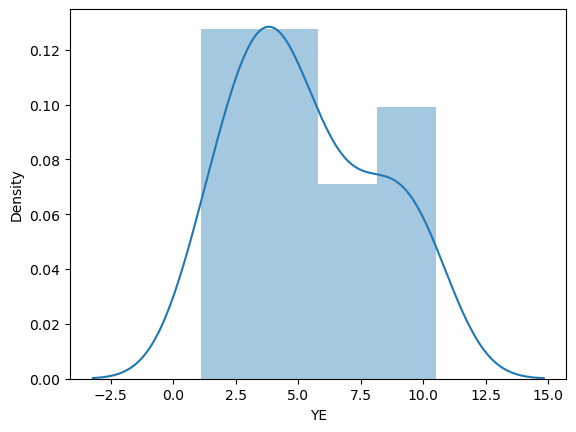

In [8]:
sns.distplot(data1['YE'])

The distribution of Year Experience data is slightly more on the right tail of the curve

In [9]:
print(skew(data1.Sal))

NameError: name 'skew' is not defined

<Axes: >

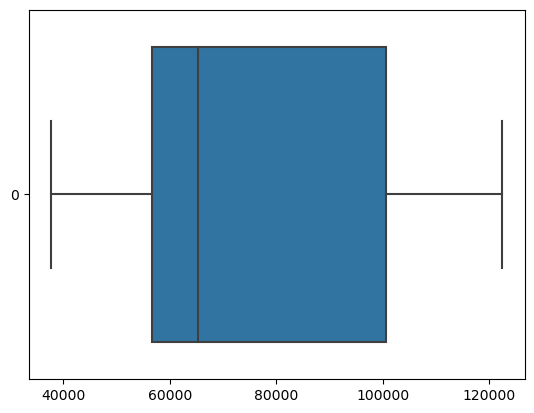

In [10]:
sns.boxplot(data1['Sal'], orient='h')

The onservations for Salary lies nearly between 57000 to 110000.The data is skewed towars right side.The median Salary is nearly 65000.

C:\Users\ubed shaikh\AppData\Local\Temp\ipykernel_14232\1963567107.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Sal'])


<Axes: xlabel='Sal', ylabel='Density'>

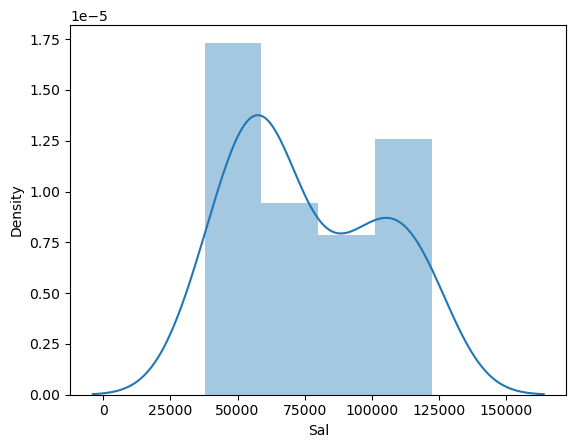

In [11]:
sns.distplot(data1['Sal'])

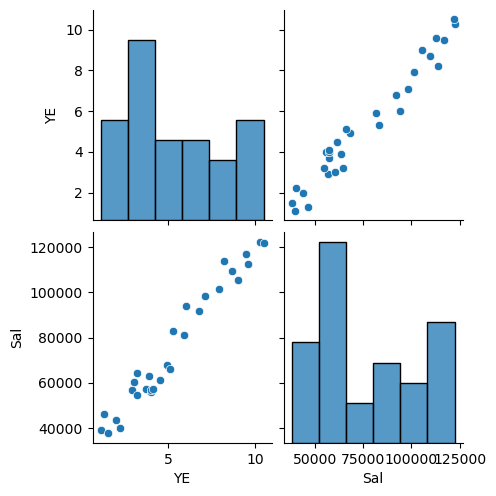

In [12]:
sns.pairplot(data1)

C:\Users\ubed shaikh\AppData\Local\Temp\ipykernel_14232\1727590720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1)


<Axes: ylabel='Density'>

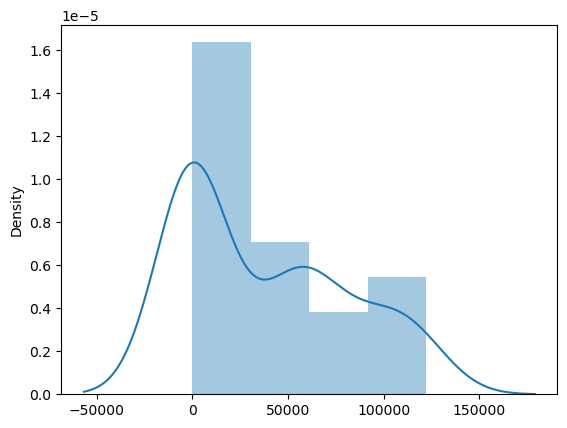

In [13]:
sns.distplot(data1)

In [14]:
data1.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


<Axes: >

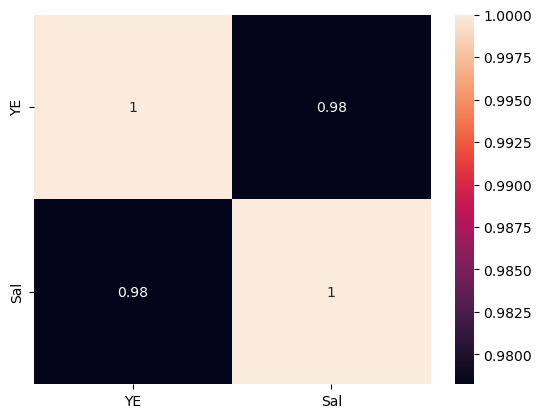

In [15]:
sns.heatmap(data1.corr(), annot=True)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

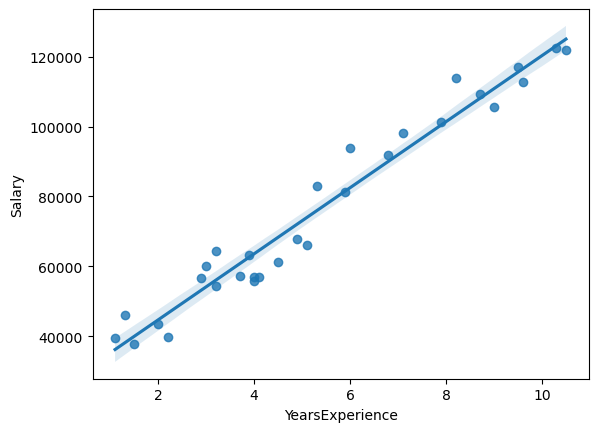

In [16]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

# Model building

In [17]:
model=smf.ols('Salary~YearsExperience',data=dataset).fit()

In [18]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.14e-20
Time:                        15:03:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [21]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# model prediction

In [22]:
# Manual prediction for say 2 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [23]:
# Automatic Prediction for say 2 & 6Years Experience
new_data=pd.Series([2,6])
new_data

0    2
1    6
dtype: int64

In [24]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2
1,6


In [25]:
model.predict(data_pred)

0    44692.124842
1    82491.974127
dtype: float64